# Matrix Factorization and Validating Your Predictions

Understand how the sparsity of real-world datasets can impact your recommendations. Leverage the power of matrix factorization to deal with this sparsity. Explore the value of latent features and use them to better understand your data. Finally, put the models you’ve discovered to the test by learning how to validate each of the approaches you’ve learned.

In [150]:
import pandas as pd

ratings = pd.read_csv('user_ratings.csv')
movies = pd.read_csv('movies.csv')

In [151]:
ratings = ratings.iloc[:, :3]

In [152]:
movies_ratings_df = pd.merge(ratings, movies, how="inner", on=["movieId"])
user_ratings = movies_ratings_df[['userId','rating','title']]

user_ratings_df = user_ratings.pivot_table(index='userId', columns='title', values='rating')

In [153]:
user_ratings_df.shape

(610, 9719)

## Matrix sparsity

A common challenge with real-world ratings data is that most users will not have rated most items, and most items will only have been rated by a small number of users. This results in a very empty or sparse DataFrame.

In this exercise, you will calculate how sparse the movie_lens ratings data is by counting the number of occupied cells and compare it to the size of the full DataFrame. The DataFrame user_ratings_df that you have used in previous exercises, containing a row per user and a column per movie, has been loaded for you.

In [154]:
# Count the occupied cells
sparsity_count = user_ratings_df.isnull().values.sum()

# Count all cells
full_count = user_ratings_df.size

# Find the sparsity of the DataFrame
sparsity = sparsity_count / full_count
print(sparsity)

0.9829922460483859


## Limited data in your rows

This data sparsity can cause an issue when using techniques like K-nearest neighbors as discussed in the last chapter. KNN needs to find the k most similar users that have rated an item, but if only less than or equal to k users have given an item the rating, all ratings will be the "most similar".

In this exercise, you will count how often each movie in the user_ratings_df DataFrame has been given a rating, and then see how many have only one or two ratings.

In [155]:
# Count the occupied cells per column
occupied_count = user_ratings_df.notnull().sum()
print(occupied_count)

title
'71 (2014)                                    1
'Hellboy': The Seeds of Creation (2004)       1
'Round Midnight (1986)                        2
'Salem's Lot (2004)                           1
'Til There Was You (1997)                     2
                                             ..
eXistenZ (1999)                              22
xXx (2002)                                   24
xXx: State of the Union (2005)                5
¡Three Amigos! (1986)                        26
À nous la liberté (Freedom for Us) (1931)     1
Length: 9719, dtype: int64


In [156]:
# Sort the resulting series from low to high
sorted_occupied_count = occupied_count.sort_values()
print(sorted_occupied_count)

title
'71 (2014)                                                                          1
Latter Days (2003)                                                                  1
Late Shift, The (1996)                                                              1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)      1
Late Night Shopping (2001)                                                          1
                                                                                 ... 
Matrix, The (1999)                                                                278
Silence of the Lambs, The (1991)                                                  279
Pulp Fiction (1994)                                                               307
Shawshank Redemption, The (1994)                                                  317
Forrest Gump (1994)                                                               329
Length: 9719, dtype: int64


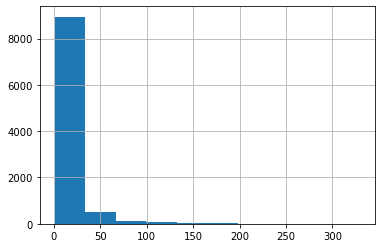

In [157]:
# Plot a histogram of the values in sorted_occupied_count
sorted_occupied_count.hist()

import matplotlib.pyplot as plt
plt.show()

## Identifying latent features

Print original_df and user_matrix using the console. The user_matrix is one of the factors of the original_df. Based on the values in the first column of the user_matrix, what do you think the latent feature may be summarizing?

Note the first row of user_matrix corresponds to User 1, the second row to User_2, and so on. Remember that latent features tend to represent underlying trends in the data and give items with these underlying trends similar scores.

In [158]:
original_df = pd.DataFrame({'user_1':[5.0,4.0,2.0,1.0],
                            'user_2':[2.0,1.0,4.0,5.0],
                            'user_3':[1.0,3.0,5.0,4.0],
                            'user_4':[4.0,5.0,1.0,2.0],
                            'user_5':[1.0,1.0,5.0,5.0]})
original_df = original_df.T

In [159]:
original_df.columns = ['Alien','Scream','Love Actually','The Notebook']

In [160]:
original_df

,Alien,Scream,Love Actually,The Notebook
user_1,5.0,4.0,2.0,1.0
user_2,2.0,1.0,4.0,5.0
user_3,1.0,3.0,5.0,4.0
user_4,4.0,5.0,1.0,2.0
user_5,1.0,1.0,5.0,5.0


In [161]:
user_matrix = ([[-3.9202913 ,  5.43628339],
       [ 2.01738539,  6.37262296],
       [ 1.46328822,  6.84850675],
       [-3.88683688,  5.47272837],
       [ 3.00873893,  6.54960159]])

In [162]:
user_matrix

[[-3.9202913, 5.43628339],
 [2.01738539, 6.37262296],
 [1.46328822, 6.84850675],
 [-3.88683688, 5.47272837],
 [3.00873893, 6.54960159]]

Possible Answers: <strong>A preference for romance movies.</strong>

## Information loss in factorization

You may wonder how the factors with far fewer columns can summarize a larger DataFrame without loss. In fact, it doesn't — the factors we create are generally a close approximation of the data, as it is inevitable for some information to be lost. This means that predicted values might not be exact, but should be close enough to be useful.

In this exercise, you will inspect the same original pre-factorization DataFrame from the last exercise loaded as original_df, and compare it to the product of its two factors, user_matrix and item_matrix.

In [163]:
item_matrix = [[-0.31315676,  0.27223577,  0.11236206, -0.6851852,   0.58797665],
 [ 0.53506273, -0.67846698,  0.34679691, -0.33676863,  0.14038957],
 [-0.58681644, -0.56753532,  0.01699735,  0.40147032,  0.41482863],
 [ 0.34689509,  0.37669009,  0.48522268,  0.50094181,  0.50138271]]

In [164]:
user_matrix = [[-0.92214831,  0.46868881, -3.93546218,  6.20017019],
 [ 0.29451291,  1.1337195,   2.00684562,  7.52205181],
 [-0.23338272, -1.58223229,  1.42823577,  7.4428733 ],
 [ 0.93640606, -0.2676827,  -3.90282275,  6.23040608],
 [-0.07751554,  0.26188815,  2.99513239,  7.67609853]]

In [165]:
import numpy as np

# Multiply the user and item matrices
predictions_df = np.dot(user_matrix, item_matrix)
# Inspect the recreated DataFrame
print(predictions_df)

# Inspect the original DataFrame and compare
print(original_df)

[[4.99975739 4.00002482 3.00049612 1.9999559  0.99971309]
 [1.94609518 1.00551231 4.11024369 3.99020215 4.93625285]
 [0.97027582 3.00303961 3.06079052 4.99459728 3.96484857]
 [4.01506891 4.99845908 2.96918167 1.00273896 2.01782031]
 [1.06960907 0.99288186 3.85763861 5.01265224 5.08231879]]
        Alien  Scream  Love Actually  The Notebook
user_1    5.0     4.0            2.0           1.0
user_2    2.0     1.0            4.0           5.0
user_3    1.0     3.0            5.0           4.0
user_4    4.0     5.0            1.0           2.0
user_5    1.0     1.0            5.0           5.0


# SVD

## Normalize your data

Before you can find the factors of the ratings matrix using singular value decomposition, you will need to "de-mean", or center it, by subtracting each row's mean from each value in that row.

In this exercise, you will begin prepping the movie rating DataFrame you have been working with in order to be able to perform Singular value decomposition.

user_ratings_df contains a row per user and a column for each movie and has been loaded for you.

In [166]:
# Get the average rating for each user 
avg_ratings = user_ratings_df.mean(axis=1)

# Center each user's ratings around 0
user_ratings_centered = user_ratings_df.sub(avg_ratings, axis=1)

# Fill in all missing values with 0s
user_ratings_centered.fillna(0, inplace=True)

# Print the mean of each column
print(user_ratings_centered.mean(axis=1))

userId
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
606    0.0
607    0.0
608    0.0
609    0.0
610    0.0
Length: 610, dtype: float64


## Decomposing your matrix

Now that you have prepped your data by centering it and filling in the remaining empty values with 0, you can get around to finding your data's factors. In this exercise, you will break the user_ratings_centered data you generated in the last exercise into 3 factors: U, sigma, and Vt.

U is a matrix with a row for each user
Vt has a column for each movie
sigma is an array of weights that you will need to convert to a diagonal matrix
The user_ratings_centered that you created in the last lesson has been loaded for you.

In [171]:
# Import the required libraries 
from scipy.sparse.linalg import svds
from scipy.linalg import sqrtm
import numpy as np

# Decompose the matrix
U, sigma, Vt = svds(user_ratings_centered)

# Convert sigma into a diagonal matrix
sigma = np.diag(sigma)
print(sigma)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


## Recalculating the matrix

Now that you have your three factor matrices, you can multiply them back together to get complete ratings data without missing values. In this exercise, you will use numpy's dot product function to multiply U and sigma first, then the result by Vt. You will then be able add the average ratings for each row to find your final ratings.

U, sigma, Vt, avg_ratings, and user_ratings_df from the previous exercise have been loaded for you. Also, numpy has been loaded as np. 

In [ ]:
# Dot product of U and sigma
U_sigma = np.dot(U, sigma)

# Dot product of result and Vt
U_sigma_Vt = np.dot(U_sigma, Vt)

# Add back on the row means contained in avg_ratings
uncentered_ratings = U_sigma_Vt + avg_ratings.values.reshape(-1, 1)

# Create DataFrame of the results
calc_pred_ratings_df = pd.DataFrame(uncentered_ratings, 
                                    index=user_ratings_df.index,
                                    columns=user_ratings_df.columns
                                   )
# Print both the recalculated matrix and the original 
print(calc_pred_ratings_df)
#print(original_df)

## Making recommendations with SVD

Now that you have the recalculated matrix with all of its gaps filled in, the next step is to use it to generate predictions and recommendations.

Using calc_pred_ratings_df that you generated in the last exercise, with all rows and columns filled, find the movies that User_5 is most likely to enjoy.

In [169]:
# Sort the ratings of User 5 from high to low
user_5_ratings = calc_pred_ratings_df.loc['User_5',:].sort_values(ascending=False)

print(user_5_ratings)

## Comparing recommendation methods

In this course, you have predicted how you believe a user would rate movies they have not seen using multiple different methods (basic average ratings, KNN, matrix factorization). In this final exercise, you'll work through a comparison of the averaged ratings and matrix factorization using the mean_squared_error() as the measure of how well they are performing. The predictions based on averages have been loaded as avg_pred_ratings_df while the calculated predictions have been loaded as calc_pred_ratings_df. The ground truth values have been loaded as act_ratings_df.

Finally, the mean_squared_error() function has been imported for your use from sklearn.metrics.

In [ ]:
# Extract the ground truth to compare your predictions against
actual_values = act_ratings_df.iloc[:20, :100].values
avg_values = avg_pred_ratings_df.iloc[:20, :100].values
predicted_values = calc_pred_ratings_df.iloc[:20, :100].values

# Create a mask of actual_values to only look at the non-missing values in the ground truth
mask = ~np.isnan(actual_values)

# Print the performance of both predictions and compare
print(mean_square_error(actual_values[mask], avg_values[mask], squared=False))
print(mean_square_error(mean_square_error[mask], predicted_values[mask], squared=False))